# Research question

Is there statistical interaction between being a smoker and association between drinking at least 1 alcoholic drink in lifetime and number of parents (0,1 or 2) who are alcoholic or problem drinker?
Namely,for Assignment of Week2 I havce explored the relationship between drinking habits of subjects and number of parents who have drinking problems. Here is the link to the assignment:

[My Assignment 2 - Chi square](http://courserablogger.tumblr.com/post/143627518993/w2-chi-square-assignment-2)

In this current assignment, I go one step further and ask if being smoker is a moderator for the relationship just mentioned. In other words, I want to explore if being smoker has an influence on the relationship between drinking alcohol and number of parents with drinking  problem. 
Moreover, I will test only for subjects who are age between 18 and 21. Thus, the first results might be slightly different than in the assignment for week 2 (as there was no restriction on age). 

# Data

I use data provided in course material- NESARC. The variables to be used:
      1. S2AQ1  - DRANK AT LEAST 1 ALCOHOLIC DRINK IN LIFE (categorical response)
         Possible values & meaning: 1 - Yes, 2-No  (Codebook,Page 30)
      2. S2DQ1 - BLOOD/NATURAL FATHER EVER AN ALCOHOLIC OR PROBLEM DRINKER
         Possible values & meaning: 1 - Yes,2-No, 9-Unknown  (Codebook,Page 77)
      3. S2DQ2 - BLOOD/NATURAL MOTHER EVER AN ALCOHOLIC OR PROBLEM DRINKER
         Possible values & meaning: 1 - Yes,2-No, 9-Unknown  (Codebook,Page 77)
      4. SMOKER - TOBACCO USE STATUS
         Possible values & meaning: 1 - Current user, 2 - Ex-user, 3 - Lifetime nonsmoker (Codebook, Page 83)  
      5. AGE - AGE
         Possible values: between 18 and 97 - age, 98 - at least 98 years old
     
So, the variable S2AQ1 will be our response variable, whereas SMOKER will be our potential moderator. As the explanatory varible I shall use a new variable, named in the code as NOPARALC, which will have 3 levels (categories): 0,1 or 2, where the level corresponds to the number of parent(s) having drinking problem.  

# Code

  In the following lines I will include my python code (generated via jupyter notebook). The code will be splitted into blocks / cells , where each block is one step of a code. The step description will be added as comment within the code. Here is the code:

In [1]:
# importing libraries
%matplotlib inline
import pandas
import numpy
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

In [2]:
## Reading data set - using the data set from the course
data = pandas.read_csv('nesarc.csv', low_memory=False)
#Subset the data (for the sake of the memory space): I take only observations for 5
#variables stated above
sub0 =  data[['S2AQ1', 'S2DQ1','S2DQ2','SMOKER','AGE']].copy()
# Subset data where we take just subjects between 18 and 21 years old
sub0['AGE'] = pandas.to_numeric(sub0['AGE'], errors='coerce')
sub0 =sub0[(sub0['AGE']>=18) & (sub0['AGE']<=21)]
#in order to define NOPARALC I need to set the S2DQ2 and S2DQ1 as numeric
sub0['S2DQ1'] = pandas.to_numeric(sub0['S2DQ1'], errors='coerce')
sub0['S2DQ2'] = pandas.to_numeric(sub0['S2DQ2'], errors='coerce')
# recode missing values to python missing (NaN)
sub0['S2DQ1']=sub0['S2DQ1'].replace(9, numpy.nan)
sub0['S2DQ2']=sub0['S2DQ2'].replace(9, numpy.nan)
#Cleaning data: I will use only subjects who have provided data on both parents, that is,
#I will ignore records with  S2DQ1=9 or  S2DQ2=9
sub1 = sub0[['S2AQ1', 'S2DQ1','S2DQ2','SMOKER']].dropna()
# For convenience I shall change values of the variables S2AQ1, S2DQ1 & S2DQ2
# so that value 0 - means 'No' and value 1 means 'Yes'
sub1['S2AQ1']=2-sub1['S2AQ1']
sub1['S2DQ1']=2-sub1['S2DQ1']
sub1['S2DQ2']=2-sub1['S2DQ2']
#defining a new varible NOPARALC which will be my explanatory variable
sub1['NOPARALC']= sub1['S2DQ1']+sub1['S2DQ2']
#Note that NOPARALC has value
# 0 if and only if both parent ARE NOT problem drinker
# 1 if and only if exactly one parent is problem drinker
# 2 if and only if both parents are problem drinkers

In [3]:
# We perform Chi-square test for association between S2AQ1 and 'NOPARALC', independent of the SMOKER status
# contingency table of observed counts
ct1=pandas.crosstab(sub1['S2AQ1'],sub1['NOPARALC'])
print (ct1)
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)
# chi-square test
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

NOPARALC   0.0  1.0  2.0
S2AQ1                   
0          640  104   11
1         1433  443   90
NOPARALC       0.0       1.0       2.0
S2AQ1                                 
0         0.308731  0.190128  0.108911
1         0.691269  0.809872  0.891089
chi-square value, p value, expected counts
(45.233044972292603, 1.5058062119803094e-10, 2, array([[  575.19845645,   151.77692025,    28.0246233 ],
       [ 1497.80154355,   395.22307975,    72.9753767 ]]))


 ## Interpretation of Chi-square test (without moderator)
    
p-value of the test is  is  1.5058062119803094e-10 <0.05. Therefore, there is enough evidence to
reject H0, that is, I may  conclude that **there is an statistically significant association between trying alcoholic drink and number of parents with drinking problem**.

As explanatory variable has 3 categories, in order to determine exactly type of this relationship it is requested to do post hoc tests. However, here we will just loosely determine the direction by plotting % of alcohol drinkers with each parent drinkers group. Namely, the focus of this assignment is to determine whether or not SMOKER moderates the relatioship. Thus, it is sufficient first to check if the SMOKER changes / influences the significance. In the case that it changes significance, it would be enough evidence to say that SMOKER is a moderator for the relationship and conclude the assignment. In the opposite case, that is,´when SMOKER does not change significance at any relevant subset of data, we should go into greater details and perform post hoc tests in order to see if it changes direction of the relationship on some subset.

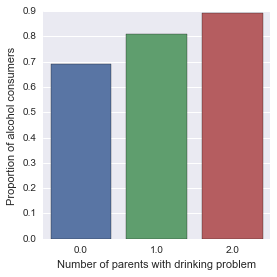

In [4]:
# graph percent with alcohol consumers within each NOPARALC group
sub1['S2AQ1'] = pandas.to_numeric(sub1['S2AQ1'], errors='coerce') 
seaborn.factorplot(x="NOPARALC", y="S2AQ1", data=sub1, kind="bar", ci=None)
plt.xlabel('Number of parents with drinking problem');
plt.ylabel('Proportion of alcohol consumers');

The graph shows that the higher the number of parents with drinking problem is, the higher probability is that the subject tried alcoholic drink. However to check whether or not it is so by chance, it is necessary to verify it by post hoc tests (see Addendum). As the focus of this assignment is not relationship itself but its potential moderator, we continue by checking if the SMOKER moderates the significance of the relationship.


## Moderator

Now we check if the variable 'SMOKER' is moderator for the relationship between 'NOPARALC' and 'S2AQ1'. In order to check that, we split the current data into 3 subsets, depending on the value of the moderator and run chi-square test on each subset separately.   

Chi sqare test with moderator check: Subset with SMOKER =  1
Number of observation in the subset is:  1    801
Name: SMOKER, dtype: int64
NOPARALC  0.0  1.0  2.0
S2AQ1                  
0          40   15    2
1         479  211   54
NOPARALC       0.0       1.0       2.0
S2AQ1                                 
0         0.077071  0.066372  0.035714
1         0.922929  0.933628  0.964286
chi-square value, p value, expected counts
(1.4172418888154421, 0.49232266985893625, 2, array([[  36.93258427,   16.082397  ,    3.98501873],
       [ 482.06741573,  209.917603  ,   52.01498127]]))
Chi sqare test with moderator check: Subset with SMOKER =  2
Number of observation in the subset is:  2    71
Name: SMOKER, dtype: int64
NOPARALC  0.0  1.0  2.0
S2AQ1                  
0           5    3    0
1          38   19    6
NOPARALC       0.0       1.0  2.0
S2AQ1                            
0         0.116279  0.136364  0.0
1         0.883721  0.863636  1.0
chi-square value, p value, expected counts


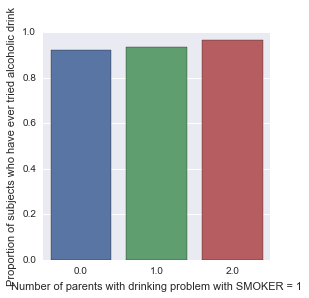

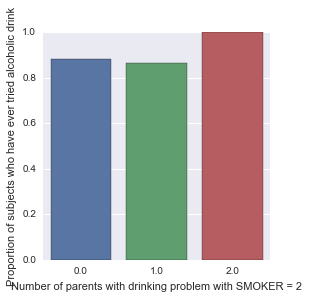

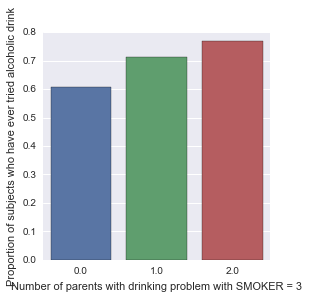

In [5]:
# Check if 'SMOKER' is moderator for the association between 'NOPARALC' and 'S2AQ1'.
#Post hoc tests (without moderator)#
  
# I create a matrix named 'p_moderator' which will contain p-values from Chi-square test, where 
# p_moderator[i] is the p-value from Chi square on subset of sub2, where 'SMOKER' has value i
l =3
p_moderator = [0 for x in range(l)] 
# I do subsetting & Chi square in the following for loop.
for i in range(1, 4):  # i determines the current value of 'SMOKER' on which we want to subset the data          
        current_subset= sub1[(sub1['SMOKER']==i)]
        print ('Chi sqare test with moderator check: Subset with SMOKER = ',i)
        size = current_subset['SMOKER'].value_counts(sort=False, dropna=True)
        print('Number of observation in the subset is: ',size)
        # contingency table of observed counts
        ct2=pandas.crosstab(current_subset['S2AQ1'], current_subset['NOPARALC'])
        print (ct2)
        # column percentages
        colsum=ct2.sum(axis=0)
        colpct=ct2/colsum
        print(colpct)     
        #chi square test for the pair
        print('chi-square value, p value, expected counts')
        cs2= scipy.stats.chi2_contingency(ct2)
        print (cs2)
        # I assign p-value to the associated entry of the matrix "p_matrix"
        p_moderator[i-1]=cs2[1] # p values 
        seaborn.factorplot(x="NOPARALC", y="S2AQ1", data=current_subset, kind="bar", ci=None)         
        plt.xlabel('Number of parents with drinking problem with SMOKER = '+ str(i))
        plt.ylabel('Proportion of subjects who have ever tried alcoholic drink') 
        #end of  for loop - end of subsetting and chi square tests 
# I create now a array "significance" which compares the obtained subsets' p-values with significance level of 0.05,
#that is, significance [i] = p_moderator[i]< 0.05.
# Therefore, significance [i][j] tells us if there is an association between NOPARALC and S2AQ1,
# on subset of data where SMOKER =i
l = 3 
significance = ['*' for x in range(l)]
for i in range(0, 3):  
      significance[i]= (p_moderator[i] < 0.05)
      # print matrix with p values
print ('p_values from Chi square on subsets')
print(p_moderator)
#print_matrix with reject
print ('p_values comarisons to significance level = 0.05')    
print(significance)
        


 ##  Is SMOKER moderator (Interpretation of Chi square on subsets)?
 
 We have obtained that actually the value of smoker's variable does influence the relationship between NOPARALC and S2AQ1. Namely, if  SMOKER takes values  1 or 2 (meaning that the subjects  was or is a smoker), then there is no statistically significant relationship between number of parents with drinking problems and alcohol consumption. However, once  smoker takes value 3 ( that is, if all the subjects are a lifetime non-smoker) then there is an association between number of parents with drinking problem and trying alcoholic drink.
 
 # Conclusion
 
 From the results above, we may conclude that whether a subject with age between 18 and 21  is an ex-smoker, a current smoker or a lifetime non-smoker has statistical interaction with relationship between subject's alcohol consumption and number of parents with drinking problem. **Namely, once considered the all available data**, the Chi square test has shown that **there is significant difference between % of subject who has ever tried alcoholic drink among groups with different number of parents with drinking problem**.
 **Once we split the available data into 3 subgroups** , depending on whether subjects are / were smokers or lifetime non-smokers, ** the relationship is NOT statistically significant in ALL subgroups.**
 ** This suffices to conclude that smoker status is a moderator for the relationship as it changes the strength - significance of the relationship. ** More precisely, the observed difference in % of youth who have ever tried alcoholic bevarage among groups with 0,1 or 2 parents with drinking problem turned out to be by chance for subjects who are or were smokers. On opposite, for lifetime non-smokers, the observed difference is statistically different.
 
 # Addendum (not necessary part; for fun)
 
 ## Further analysis - Does moderator change pairwise significance between different NOPARALC groups ?
 
 We could examine the question if the moderator changes the pairwise significance of the relationship on subgroups where the relationship was significant. For this purpose, we firstly have to determine pairwise relationship within  original (not splited) data by means of post hoc tests. 
 
 ##  Post hoc tests for all available data (without moderator) 
  
#As the explanatory variable has 3 levels there are 3!/((3-2)!*2!)=3 pairs to compare. Furthermore, the Adjusted Bonferroni coefficent is then equal to 0.05/3. Here is code for post hoc tests:

In [6]:
#Post hoc tests (without moderator)#
  
# I create a matrix named 'p_matrix' which will contain p-values from pairwise comparisons
# More precisely, p_matrix [i][j] = p-value from Chi square test by comparing NOPARALC=I vs. NOPARALC=j
#Initialize p_matrix with "*"
c, r = 3, 3 
p_matrix = [['*' for x in range(c)] for y in range(r)] 
# I do pairwise comparison via double for loop: 
# (i,j) is pair of values of NOPARALC  for current pairwise comparison
for i in range(1, 3):  # i is the first value of NOPARALC in the pairwise comparison
    for j in range(0, i): #j is the second value of the pairwise comparison       
        pair_data= sub1[(sub1['NOPARALC']==i) | (sub1['NOPARALC']==j)]
        print ('Post hoc test: Pairwise comparison between groups with NOPARALC: ', j ,' and ',i)
        # contingency table of observed counts
        ct2=pandas.crosstab(pair_data['S2AQ1'], pair_data['NOPARALC'])
        print (ct2)
        # column percentages
        colsum=ct2.sum(axis=0)
        colpct=ct2/colsum
        print(colpct)     
        #chi square test for the pair
        print('chi-square value, p value, expected counts')
        cs2= scipy.stats.chi2_contingency(ct2)
        print (cs2)
        # I assign p-value to the associated entry of the matrix "p_matrix"
        p_matrix[i][j]=cs2[1] # p values 
#end of comparisons
# I create now a matrix "reject" which compares the obtained pairwise p-values with the adjusted Bonferroni coefficient,
#that is, reject [i][j] = p_matrix[i][j] < Bonferroni adjusted p-value.
# Therefore, reject [i][j] tells us if the pair NOPARALC =i & NOPARALC =j are significantly different        
c, r = 3, 3 
reject = [['*' for x in range(c)] for y in range(r)] 
for i in range(1, 3):  # i is the first value of NOPARALC in the pairwise comparison
    for j in range(0, i): #j is the second dvalue of the pairwise comparison
      reject[i][j]= (p_matrix[i][j] < (0.05/3))
      # print matrix with p values
print ('p_values from post hoc tests')
print(p_matrix)
#print_matrix with reject
print ('p_values comarisons to Bonferroni adjusted p-value = 0.05/3')    
print(reject)

Post hoc test: Pairwise comparison between groups with NOPARALC:  0  and  1
NOPARALC   0.0  1.0
S2AQ1              
0          640  104
1         1433  443
NOPARALC       0.0       1.0
S2AQ1                       
0         0.308731  0.190128
1         0.691269  0.809872
chi-square value, p value, expected counts
(29.361204674785537, 6.0068198328292854e-08, 1, array([[  588.66870229,   155.33129771],
       [ 1484.33129771,   391.66870229]]))
Post hoc test: Pairwise comparison between groups with NOPARALC:  0  and  2
NOPARALC   0.0  2.0
S2AQ1              
0          640   11
1         1433   90
NOPARALC       0.0       2.0
S2AQ1                       
0         0.308731  0.108911
1         0.691269  0.891089
chi-square value, p value, expected counts
(17.390545224560711, 3.0433609161154846e-05, 1, array([[  620.75574977,    30.24425023],
       [ 1452.24425023,    70.75574977]]))
Post hoc test: Pairwise comparison between groups with NOPARALC:  1  and  2
NOPARALC  1.0  2.0
S2AQ1      

### Post hoc tests (without moderator) - Interpretation

As all pairwise p-values are less than Bonferroni adjusted p-value except for pair where NOPARALC = 2 & NOPARALC =3  we may conclude that:

Percentage of adults between 18 and 21 years old and who have ever tried an  alcoholic beverages is significantly different between group of those whose parents have no drinking problem and subjects whose 1 or 2 parents have drinking problem. There is no significant difference in % of subjects who tried alcoholic drink among subjects with  1 or 2 parents with drinking problems.

## Post hoc tests on subsets where the replationship was significant
 
 According to p-values of the Chi square tests on subgroups, it turns out that the relationship is significant only on subset where SMOKER = 3, that is, only for subjects who are lifetime non-smokers. The open question is: Considering only subjects who are non- smoker, is the relationship between NOPARALC and SA1Q2 pairwise insignificant only between groups NOPARALC=2 and NOPARALC=3 ( as it was the case with the all vailable data) or it has further insignificantly different pairwise NOPARALCs groups?
 For this purpose, we perform post hoc test only on the subset where SMOKER = 3. As the explanatory variable is , as before, NOPARALC with 3 categories, the adjusted Bonferroni p-value stays 0.05/3. Here is the code for the post hoc test on the subset:

In [7]:
#Post hoc tests on subset with lifetime nonsmokers#
non_smokers_data =sub1[sub1['SMOKER']==3]
# I create a matrix named 'non_smokers_p_matrix' which will contain p-values from pairwise comparisons
# More precisely, non_smokers_p_matrix [i][j] = p-value from Chi square test by comparing NOPARALC=I vs. NOPARALC=j
#Initialize non_smokers_p_matrix with "*"
c, r = 3, 3 
non_smokers_p_matrix = [['*' for x in range(c)] for y in range(r)] 
# I do pairwise comparison via double for loop: 
# (i,j) is pair of values of NOPARALC  for current pairwise comparison
for i in range(1, 3):  # i is the first value of NOPARALC in the pairwise comparison
    for j in range(0, i): #j is the second value of the pairwise comparison       
        pair_data= non_smokers_data[(non_smokers_data['NOPARALC']==i) | (non_smokers_data['NOPARALC']==j)]
        print ('Post hoc test for lifetime non-smokers: Pairwise comparison between groups with NOPARALC: ', j ,' and ',i)
        # contingency table of observed counts
        ct2=pandas.crosstab(pair_data['S2AQ1'], pair_data['NOPARALC'])
        print (ct2)
        # column percentages
        colsum=ct2.sum(axis=0)
        colpct=ct2/colsum
        print(colpct)     
        #chi square test for the pair
        print('chi-square value, p value, expected counts')
        cs2= scipy.stats.chi2_contingency(ct2)
        print (cs2)
        # I assign p-value to the associated entry of the matrix "p_matrix"
        non_smokers_p_matrix[i][j]=cs2[1] # p values 
#end of comparisons
# I create now a matrix "non_smokers_reject" which compares the obtained pairwise p-values 
# with the adjusted Bonferroni coefficient,
#that is, non_smokers_reject[i][j] = p_matrix[i][j] < Bonferroni adjusted p-value.
# Therefore, non_smokers_reject [i][j] tells us if the pair NOPARALC =i & NOPARALC =j are significantly different        
c, r = 3, 3 
non_smokers_reject = [['*' for x in range(c)] for y in range(r)] 
for i in range(1, 3):  # i is the first value of NOPARALC in the pairwise comparison
    for j in range(0, i): #j is the second dvalue of the pairwise comparison
      non_smokers_reject[i][j]= (non_smokers_p_matrix[i][j] < (0.05/3))
      # print matrix with p values
print ('p_values from post hoc tests')
print(non_smokers_p_matrix)
#print_matrix with reject
print ('p_values comarisons to Bonferroni adjusted p-value = 0.05/3')    
print(non_smokers_reject)

Post hoc test for lifetime non-smokers: Pairwise comparison between groups with NOPARALC:  0  and  1
NOPARALC  0.0  1.0
S2AQ1             
0         595   86
1         916  213
NOPARALC       0.0       1.0
S2AQ1                       
0         0.393779  0.287625
1         0.606221  0.712375
chi-square value, p value, expected counts
(11.537055043537253, 0.00068222622855771136, 1, array([[ 568.50331492,  112.49668508],
       [ 942.49668508,  186.50331492]]))
Post hoc test for lifetime non-smokers: Pairwise comparison between groups with NOPARALC:  0  and  2
NOPARALC  0.0  2.0
S2AQ1             
0         595    9
1         916   30
NOPARALC       0.0       2.0
S2AQ1                       
0         0.393779  0.230769
1         0.606221  0.769231
chi-square value, p value, expected counts
(3.5899989479924082, 0.058128279940328188, 1, array([[ 588.80258065,   15.19741935],
       [ 922.19741935,   23.80258065]]))
Post hoc test for lifetime non-smokers: Pairwise comparison between groups

The post hoc tests on the subset shows that the statistically significant difference between % of youth who have ever tried alcohol only  between group with no parent with drinking problem and group with exactly 1 parent with drinking problem. So, the difference between the group with 0 and 2 ,respectively, became insignificant (compared to all available data). My guess is that it became insignificant due to relative small observations with subject who are lifetime non-smokers and with 2 parents with drinking problem.